In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_27484\2911097050.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


tensor([0.0000, 1.3333])


Text(0.5, 1.0, 'Dropout with p=0.25')

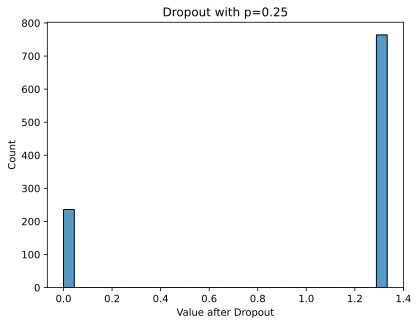

In [6]:
prob = 0.25

dropout = nn.Dropout(p=prob)
x = torch.ones(1000)
y = dropout(x)
print(y.unique()) # the values are either 0 or 1/(1-p) = 1.3333... to maintain the expected value of the input
sns.histplot(y.numpy(), bins=30)
plt.xlabel('Value after Dropout')
plt.title(f'Dropout with p={prob}')

Text(0.5, 1.0, 'Dropout Evaluation Mode with p=0.25')

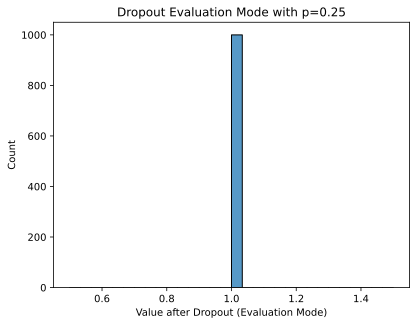

In [3]:
# dropout is turned off when evaluating the model
dropout.eval()
y_eval = dropout(x)
sns.histplot(y_eval.numpy(), bins=30)
plt.xlabel('Value after Dropout (Evaluation Mode)')
plt.title(f'Dropout Evaluation Mode with p={prob}')

In [ ]:
# annoyingly, F.dropout does not have an eval mode, so we have to use the functional 
# API and manually set training=False
# The advantage of using F.dropout is that it can be applied to any tensor without needing 
# to define a dropout layer first
dropout.eval()
y = F.dropout(x, p=prob, training=False)
print(y.unique()) # the values are all 1, as expected when dropout is turned off

tensor([0.0000, 1.3333])


In [11]:
# the model needs to be reset after toggling between training and evaluation modes,
#  otherwise the dropout layer will be stuck in eval mode and will not apply dropout during training
dropout.train()
y = dropout(x)
print(y.unique()) # the values are either 0 or 1/(1-p) = 1.3333... to maintain the expected value of the input

tensor([0.0000, 1.3333])
